In [1]:
import numpy as np
import scipy.io.wavfile as wav
import os
from tqdm import tqdm
import logging
import time
import sys
sys.path.insert(0, "/home/minhtri/AE/")
import ssplib
import pdb
import matplotlib.pyplot as plt
###################################### ALL COFIGURATION #########################
result_dir = os.path.join('/home/minhtri/AE/WaveUNet/Multichannel_WUN/beamformer/enhanced')

project_dir = os.getcwd()
DB_dir = '/home/minhtri/AE/DB/TIMIT/TEST_CORE'

enhanced_wav_list = ssplib.read_txt_file(os.path.join(result_dir, 'mvdr_enhanced_wav_list.txt'))

# ntype_lib = ['babble', 'factory1', 'white', 'aurora4_restaurant_1', 'destroyerengine', 'aurora4_exhibition_1']
ntype_lib = ["aurora4_airport_1", "aurora4_lobby_1", "aurora4_station_1", "babble", "destroyerops", "DLIVING", "factory1", "leopard", "pink", "SPSQUARE", "STRAFFIC", "volvo", "aurora4_benz_1", "aurora4_exhibition_1", "dcube_record", "destroyerengine", "OMEETING"]
snrtype_lib = ['-10dB', '-5dB', '0dB', '5dB', '10dB']

################################################################################



def lets_log(log_dir):
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    stream_hander = logging.StreamHandler()
    logger.addHandler(stream_hander)
    file_handler = logging.FileHandler(os.path.join(log_dir))
    logger.addHandler(file_handler)
    return logger
logger = lets_log(os.path.join(result_dir, 'score.txt'))


score_sdr = [[[] for n in range(len(snrtype_lib))] for m in range(len(ntype_lib))]
score_stoi = [[[] for n in range(len(snrtype_lib))] for m in range(len(ntype_lib))]

start_time = time.time()



In [22]:
file_idx = 0
print(" evaluate file: ", enhanced_wav_list[file_idx])
addr_clean = os.path.join(DB_dir, os.sep.join(enhanced_wav_list[file_idx].split(os.sep)[-1].split('_')[:3]))
_, _clean = wav.read(addr_clean+'.wav')
# _, clean = wav.read("/home/minhtri/AE/WaveUNet/Multichannel_WUN/Storage/baseline3_1s_rever_ch1/noisy/babble/10dB/DR1_FELC0_SI1386_1a0_2a50.wav")
fs, enhanced = wav.read("/home/minhtri/AE/WaveUNet/WaveUNet_modified/Storage/baseline3_multi_1s_cossim/noisy/aurora4_airport_1/-10dB/DR1_FELC0_SI1386_1a0_2a60.wav.wav")
# fs, enhanced = wav.read("/home/minhtri/" + enhanced_wav_list[file_idx])

clean = _clean[600:]

#     ntype_idx = enhanced_wav_list[n].split(os.sep)[-3]
#     m = ntype_lib.index(ntype_idx)
#     snrtype_idx = enhanced_wav_list[n].split(os.sep)[-2]
#     l = snrtype_lib.index(snrtype_idx)
#     vsdr, _, _, _, vstoi = ssplib.objective_measurements(clean, enhanced, fs)
#     score_sdr[m][l].append(vsdr - np.float(snrtype_idx.split('dB')[0]))
# #     print("score sdr = ", score_sdr)
#     score_stoi[m][l].append(vstoi)

# # score_sdr = np.array(score_sdr)
# print("score_sdr", score_sdr)
# mean_sdr = np.mean(score_sdr, 2)
# mean_stoi = np.mean(score_stoi, 2)
# end_time = time.time()
# print('time: {}'.format(end_time - start_time))

# logger.info('SDR')
# logger.info("\n".join(" ".join(map(str, line)) for line in mean_sdr))

# logger.info('STOI')
# logger.info("\n".join(" ".join(map(str, line)) for line in mean_stoi))

for i in [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 75, 76, 77, 78, 80, 100, 110, 120, 200, 87]:
    vsdr, _, _, _, vstoi = ssplib.objective_measurements(clean, enhanced[i:], fs)
    print("i = ", i,  "     sdr = " , vsdr, "    stoi = ", vstoi)

# vsdr, _, _, _, vstoi = ssplib.objective_measurements(clean, clean, fs)
# print(vstoi)

 evaluate file:  AE/WaveUNet/Multichannel_WUN/beamformer/enhanced/aurora4_airport_1/10dB/DR1_FELC0_SI1386_1a0_4a70.wav
i =  0      sdr =  9.591448842298938     stoi =  0.4825854924770764
i =  5      sdr =  9.592994008736607     stoi =  0.4866290152247041
i =  10      sdr =  9.596559844951663     stoi =  0.4907011500689118
i =  15      sdr =  9.593820989867494     stoi =  0.49478407529572155
i =  20      sdr =  9.59195496346016     stoi =  0.49886653501520817
i =  30      sdr =  9.58896248623451     stoi =  0.5070657546828322
i =  40      sdr =  9.60574315823454     stoi =  0.5152564377562528
i =  50      sdr =  9.607600882232935     stoi =  0.5234619262982696
i =  60      sdr =  9.621455036342176     stoi =  0.5318403958800723
i =  70      sdr =  9.621203936942733     stoi =  0.5404597733962816
i =  75      sdr =  9.62233038954385     stoi =  0.5448822311095091
i =  76      sdr =  9.62235895234127     stoi =  0.5457759072139869
i =  77      sdr =  9.622330687392918     stoi =  0.546676

negative result show signal1 cham hon signal2
187


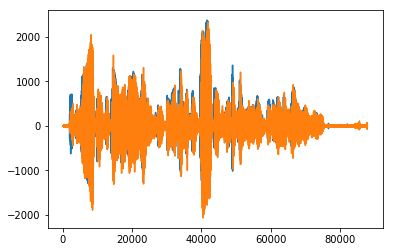

In [20]:
import minselib as se
if len(clean) > len(enhanced): clean = clean[:len(enhanced)]
else: enhanced = enhanced[:len(clean)]
tdoa = se.tdoa_cc(clean, enhanced, max_lag=500, plot=False)
print(tdoa)

plt.figure(1)
plt.plot(clean)
# plt.show()
# plt.figure(2)
plt.plot(enhanced)
plt.show()   

In [ ]:
i =  0      sdr =  18.55211525327952
i =  5      sdr =  18.53405488149042
i =  10      sdr =  18.530894104505357
i =  15      sdr =  18.528107633381694
i =  20      sdr =  18.51720396020499
i =  30      sdr =  18.430575767761304
i =  40      sdr =  18.407735105500734
i =  50      sdr =  18.36016970139575
i =  60      sdr =  18.26440069288797
i =  70      sdr =  18.2405619515446
i =  80      sdr =  17.965785805516987
i =  100      sdr =  6.180621352741826
i =  200      sdr =  -2.7586146965325495
i =  87      sdr =  15.246582585601958